Resize Shape: (64, 64, 3) Range: 18 252


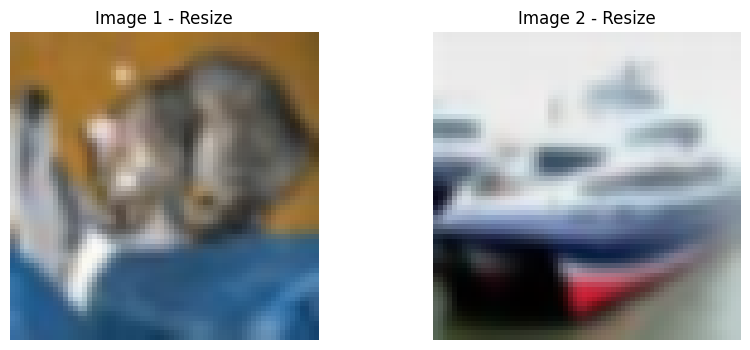

Grayscale Shape: (64, 64) Range: 38 251


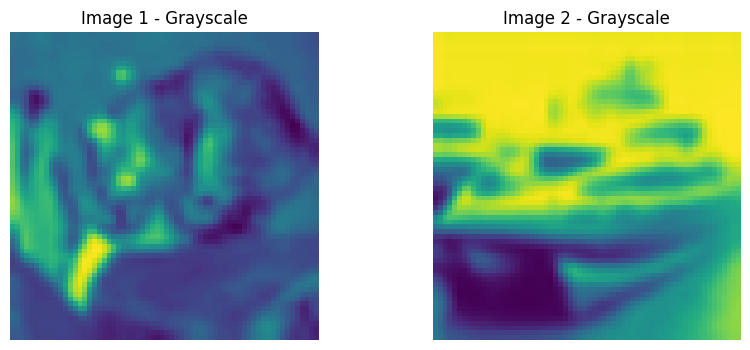

Rotation Shape: (64, 64) Range: 0 251


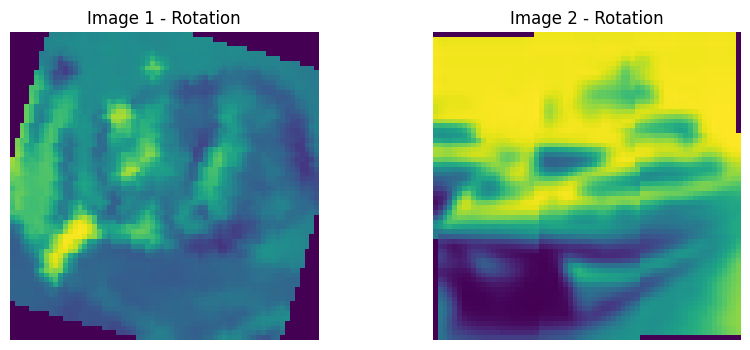

Flip Shape: (64, 64) Range: 0 251


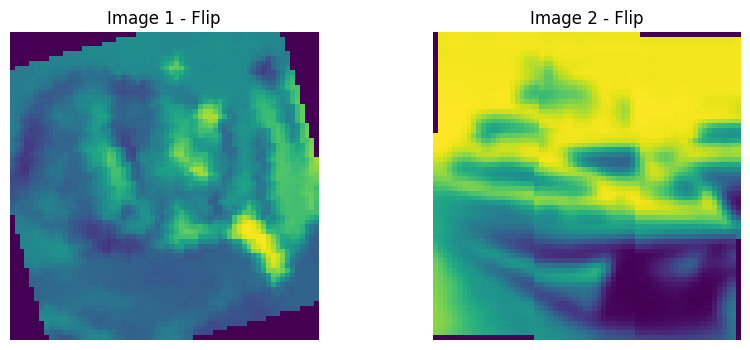

Normalized Shape: torch.Size([1, 64, 64]) Range: -1.0 0.9686274528503418
Sharpened Range: -5.9098043 3.8392158


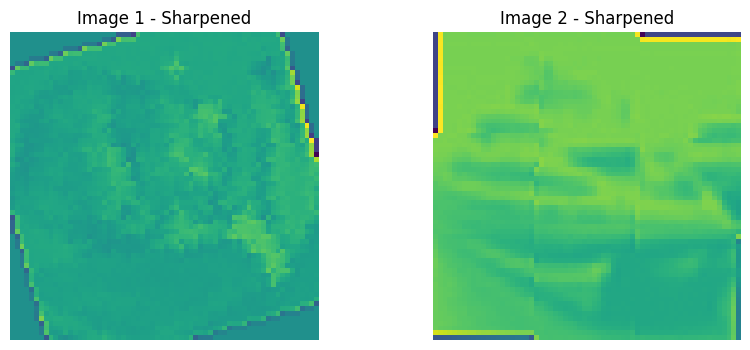

Final Tensor Shape: torch.Size([2, 1, 64, 64])


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True
)

# Select two images
img1, _ = dataset[0]
img2, _ = dataset[1]

# Helper function to display images
def show_images(images, titles):
    plt.figure(figsize=(10, 4))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# Step 1: Resize
resize = transforms.Resize((64, 64))
img1_r = resize(img1)
img2_r = resize(img2)

print("Resize Shape:", np.array(img1_r).shape,
      "Range:", np.min(img1_r), np.max(img1_r))

show_images([img1_r, img2_r], ["Image 1 - Resize", "Image 2 - Resize"])

# Step 2: Grayscale
gray = transforms.Grayscale(num_output_channels=1)
img1_g = gray(img1_r)
img2_g = gray(img2_r)

print("Grayscale Shape:", np.array(img1_g).shape,
      "Range:", np.min(img1_g), np.max(img1_g))

show_images([np.array(img1_g).squeeze(), np.array(img2_g).squeeze()],
            ["Image 1 - Grayscale", "Image 2 - Grayscale"])

# Step 3: Rotation
rotate = transforms.RandomRotation(30)
img1_rot = rotate(img1_g)
img2_rot = rotate(img2_g)

print("Rotation Shape:", np.array(img1_rot).shape,
      "Range:", np.min(img1_rot), np.max(img1_rot))

show_images([np.array(img1_rot).squeeze(), np.array(img2_rot).squeeze()],
            ["Image 1 - Rotation", "Image 2 - Rotation"])

# Step 4: Horizontal Flip
flip = transforms.RandomHorizontalFlip(p=1.0)
img1_f = flip(img1_rot)
img2_f = flip(img2_rot)

print("Flip Shape:", np.array(img1_f).shape,
      "Range:", np.min(img1_f), np.max(img1_f))

show_images([np.array(img1_f).squeeze(), np.array(img2_f).squeeze()],
            ["Image 1 - Flip", "Image 2 - Flip"])

# Step 5: Normalization
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.5], std=[0.5])

img1_n = normalize(to_tensor(img1_f))
img2_n = normalize(to_tensor(img2_f))

print("Normalized Shape:", img1_n.shape,
      "Range:", img1_n.min().item(), img1_n.max().item())

# Step 6 (Bonus): Custom Sharpening Filter
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

def apply_filter(img):
    img_np = img.squeeze().numpy()
    filtered = cv2.filter2D(img_np, -1, kernel)
    return filtered

img1_sharp = apply_filter(img1_n)
img2_sharp = apply_filter(img2_n)

print("Sharpened Range:",
      img1_sharp.min(), img1_sharp.max())

show_images([img1_sharp, img2_sharp],
            ["Image 1 - Sharpened", "Image 2 - Sharpened"])

# Step 7: Combine into batch tensor
batch = torch.stack([img1_n, img2_n])
print("Final Tensor Shape:", batch.shape)
